# Cleaning and Summary of Data

First, I'll need to tidy up the data by removing null values and ensuring all columns are set to the correct data type.

In [1]:
from db_utils import DataTransform, DataFrameInfo, Plotter, DataFrameTransforms, save_changes
import seaborn as sns

dt = DataTransform()
df_info = DataFrameInfo()
visualise = Plotter()
transform = DataFrameTransforms()

df = dt.read_data('loan_payments.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54231 entries, 0 to 54230
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           54231 non-null  int64  
 1   member_id                    54231 non-null  int64  
 2   loan_amount                  54231 non-null  int64  
 3   funded_amount                51224 non-null  float64
 4   funded_amount_inv            54231 non-null  float64
 5   term                         49459 non-null  object 
 6   int_rate                     49062 non-null  float64
 7   instalment                   54231 non-null  float64
 8   grade                        54231 non-null  object 
 9   sub_grade                    54231 non-null  object 
 10  employment_length            52113 non-null  object 
 11  home_ownership               54231 non-null  object 
 12  annual_inc                   54231 non-null  float64
 13  verification_sta

I will call the methods from `db_utils.py` file and clean the data.

In [2]:
category_cols = ['grade', 'sub_grade', 'home_ownership', 'verification_status', 'loan_status', 'payment_plan', 'purpose', 'application_type', 'employment_length']
dt.change_dtype(df, category_cols, 'category')

dt.change_dtype(df, 'loan_amount', float)

datetime_cols = ['issue_date', 'earliest_credit_line', 'last_payment_date', 'next_payment_date', 'last_credit_pull_date']
dt.change_column_to_datetime(df, datetime_cols)

dt.extract_numerical_chars(df, 'term')
dt.rename_column(df, 'term', 'term_(months)')

save_changes(df, 'cleaned_loan_data.csv')

Now the data has been cleaned, I want some further information on the dataframe as a whole.
The describe method provides us with numerical information on each column:

In [3]:
df.describe()

,id,member_id,loan_amount,funded_amount,funded_amount_inv,int_rate,instalment,annual_inc,dti,delinq_2yrs,...,total_payment_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_payment_amount,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code
count,5.423100e+04,5.423100e+04,54231.000000,51224.000000,54231.000000,49062.000000,54231.000000,5.423100e+04,54231.000000,54231.000000,...,54231.000000,54231.000000,54231.000000,54231.000000,54231.000000,54231.000000,54231.000000,54180.000000,7499.000000,54231.0
mean,7.621797e+06,8.655350e+06,13333.076100,13229.509117,12952.622979,13.507328,400.013953,7.222085e+04,15.867087,0.241799,...,11788.946618,9407.048589,2577.757101,0.901512,93.501288,10.859057,3130.706393,0.004208,42.253634,1.0
std,9.571362e+06,1.031281e+07,8082.196709,8019.017599,8099.473527,4.392893,238.920012,5.158934e+04,7.623124,0.706706,...,8363.508506,6958.124264,2581.657345,6.215792,630.843636,120.193950,5323.801675,0.070990,21.052360,0.0
min,5.552100e+04,7.069400e+04,500.000000,500.000000,0.000000,5.420000,15.670000,3.300000e+03,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,7.594330e+05,9.587720e+05,7000.000000,7000.000000,6700.000000,10.370000,224.205000,4.500000e+04,10.200000,0.000000,...,5658.815000,4264.350000,889.560000,0.000000,0.000000,0.000000,289.790000,0.000000,26.000000,1.0
50%,7.084590e+06,8.709873e+06,12000.000000,12000.000000,11300.000000,13.160000,347.150000,6.100000e+04,15.600000,0.000000,...,9835.830000,7644.920000,1734.640000,0.000000,0.000000,0.000000,562.670000,0.000000,42.000000,1.0
75%,8.860616e+06,1.052714e+07,18000.000000,18000.000000,18000.000000,16.200000,527.550000,8.600000e+04,21.260000,0.000000,...,15978.200000,12505.625000,3323.765000,0.000000,0.000000,0.000000,3738.120000,0.000000,59.000000,1.0
max,3.867612e+07,4.146185e+07,35000.000000,35000.000000,35000.000000,26.060000,1407.010000,2.039784e+06,39.910000,18.000000,...,55061.000000,35000.020000,23062.450000,358.680000,27750.000000,7002.190000,36115.200000,4.000000,146.000000,1.0


In [4]:
df_info.size_of_dataframe(df)

Size of dataframe: (54231, 43)


By printing the size of the dataframe by using `shape`, we can see that the dataframe has 54,231 rows and 43 columns.

I want to check that the id columns do not contain any duplicates and so I would expect 54,231 different ids in both columns.

In [5]:
df_info.get_unique_values(df, ['id', 'member_id'])

Number of unique values in ['id', 'member_id']: 
id           54231
member_id    54231
dtype: int64


This matches the amount of rows expected in the dataframe and so we know there are no duplicate rows.

I will explore some other info to get a feel for the data I am working with.

In [6]:
df_info.get_mean(df, ['loan_amount', 'total_payment'])

Mean of ['loan_amount', 'total_payment'] is: 
loan_amount      13333.08
total_payment    12079.21
dtype: float64


In [7]:
df_info.get_median(df, ['loan_amount', 'total_payment'])

Median of ['loan_amount', 'total_payment'] is: 
loan_amount      12000.00
total_payment    10113.25
dtype: float64


In [8]:
df_info.get_mode(df, ['grade', 'sub_grade'])

Most frequent value in ['grade', 'sub_grade'] is: 
  grade sub_grade
0     B        B3


The most common grade and subgrade are both within the same grade 'B' so it is as expected.

In [9]:
df_info.get_std(df)

Standard deviation of each numeric column is: 
id                                           9571361.647372
member_id                                   10312806.882093
loan_amount                                     8082.196709
funded_amount                                   8019.017599
funded_amount_inv                               8099.473527
int_rate                                           4.392893
instalment                                       238.920012
annual_inc                                     51589.339577
issue_date                      624 days 01:12:17.861985984
dti                                                7.623124
delinq_2yrs                                        0.706706
earliest_credit_line           2604 days 23:26:47.927898496
inq_last_6mths                                     1.261421
mths_since_last_delinq                             21.92324
mths_since_last_record                            36.137264
open_accounts                                      4.

/Users/corynsexton/Documents/Ai_Core/EDA-Customer-Loans-in-Finance/db_utils.py:167: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(f'Standard deviation of each numeric column is: \n{df.std()}')


## Null Values

I now want to see if there are any null values in the dataframe and if so, which columns they are in so I can either remove or transform them.

Let's visualise the nulls by displaying a matrix where the white space represents the null values in each column.

Axes(0.125,0.11;0.698618x0.77)


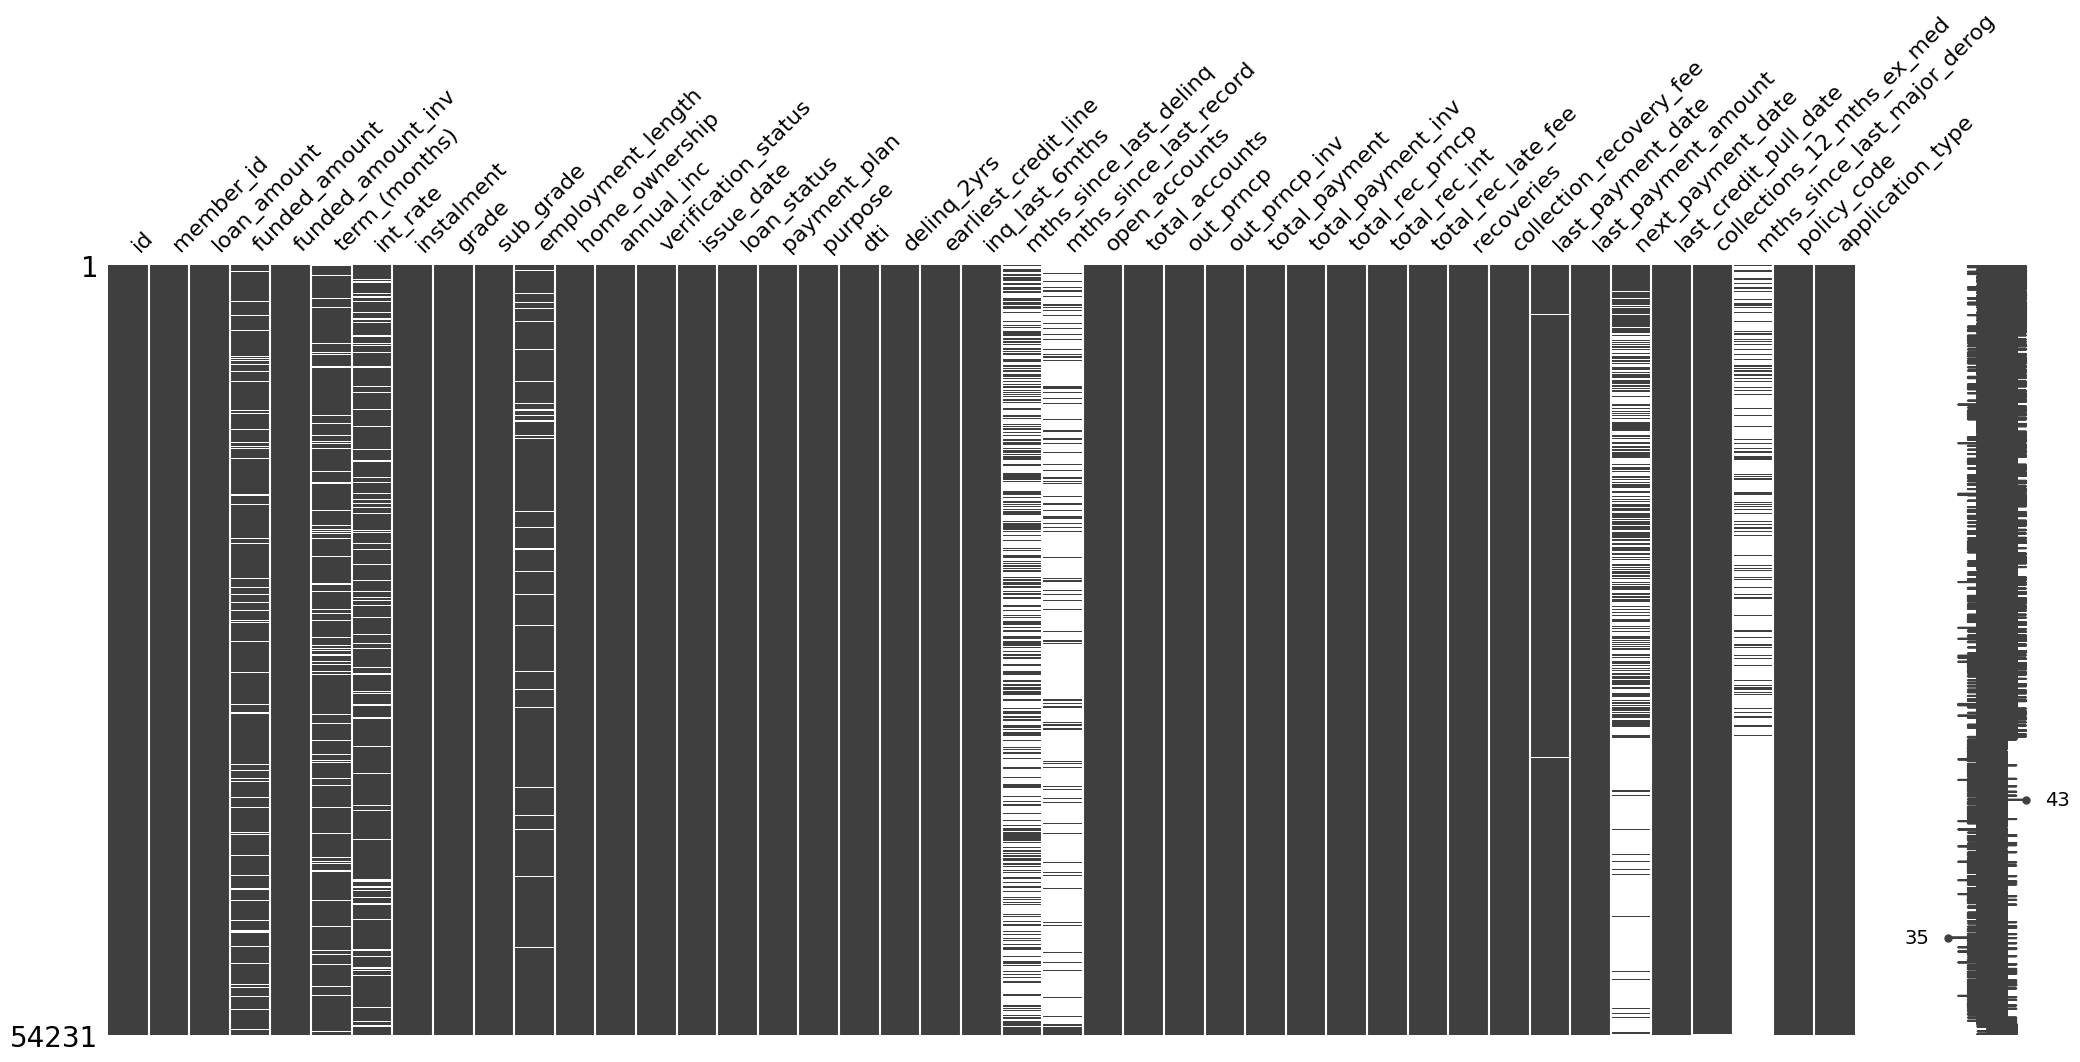

In [10]:
visualise.null_matrix(df)

Another way of visualising missing values is a bar chart - the lower the bar, the more null values are present in the column.

Axes(0.125,0.11;0.775x0.77)


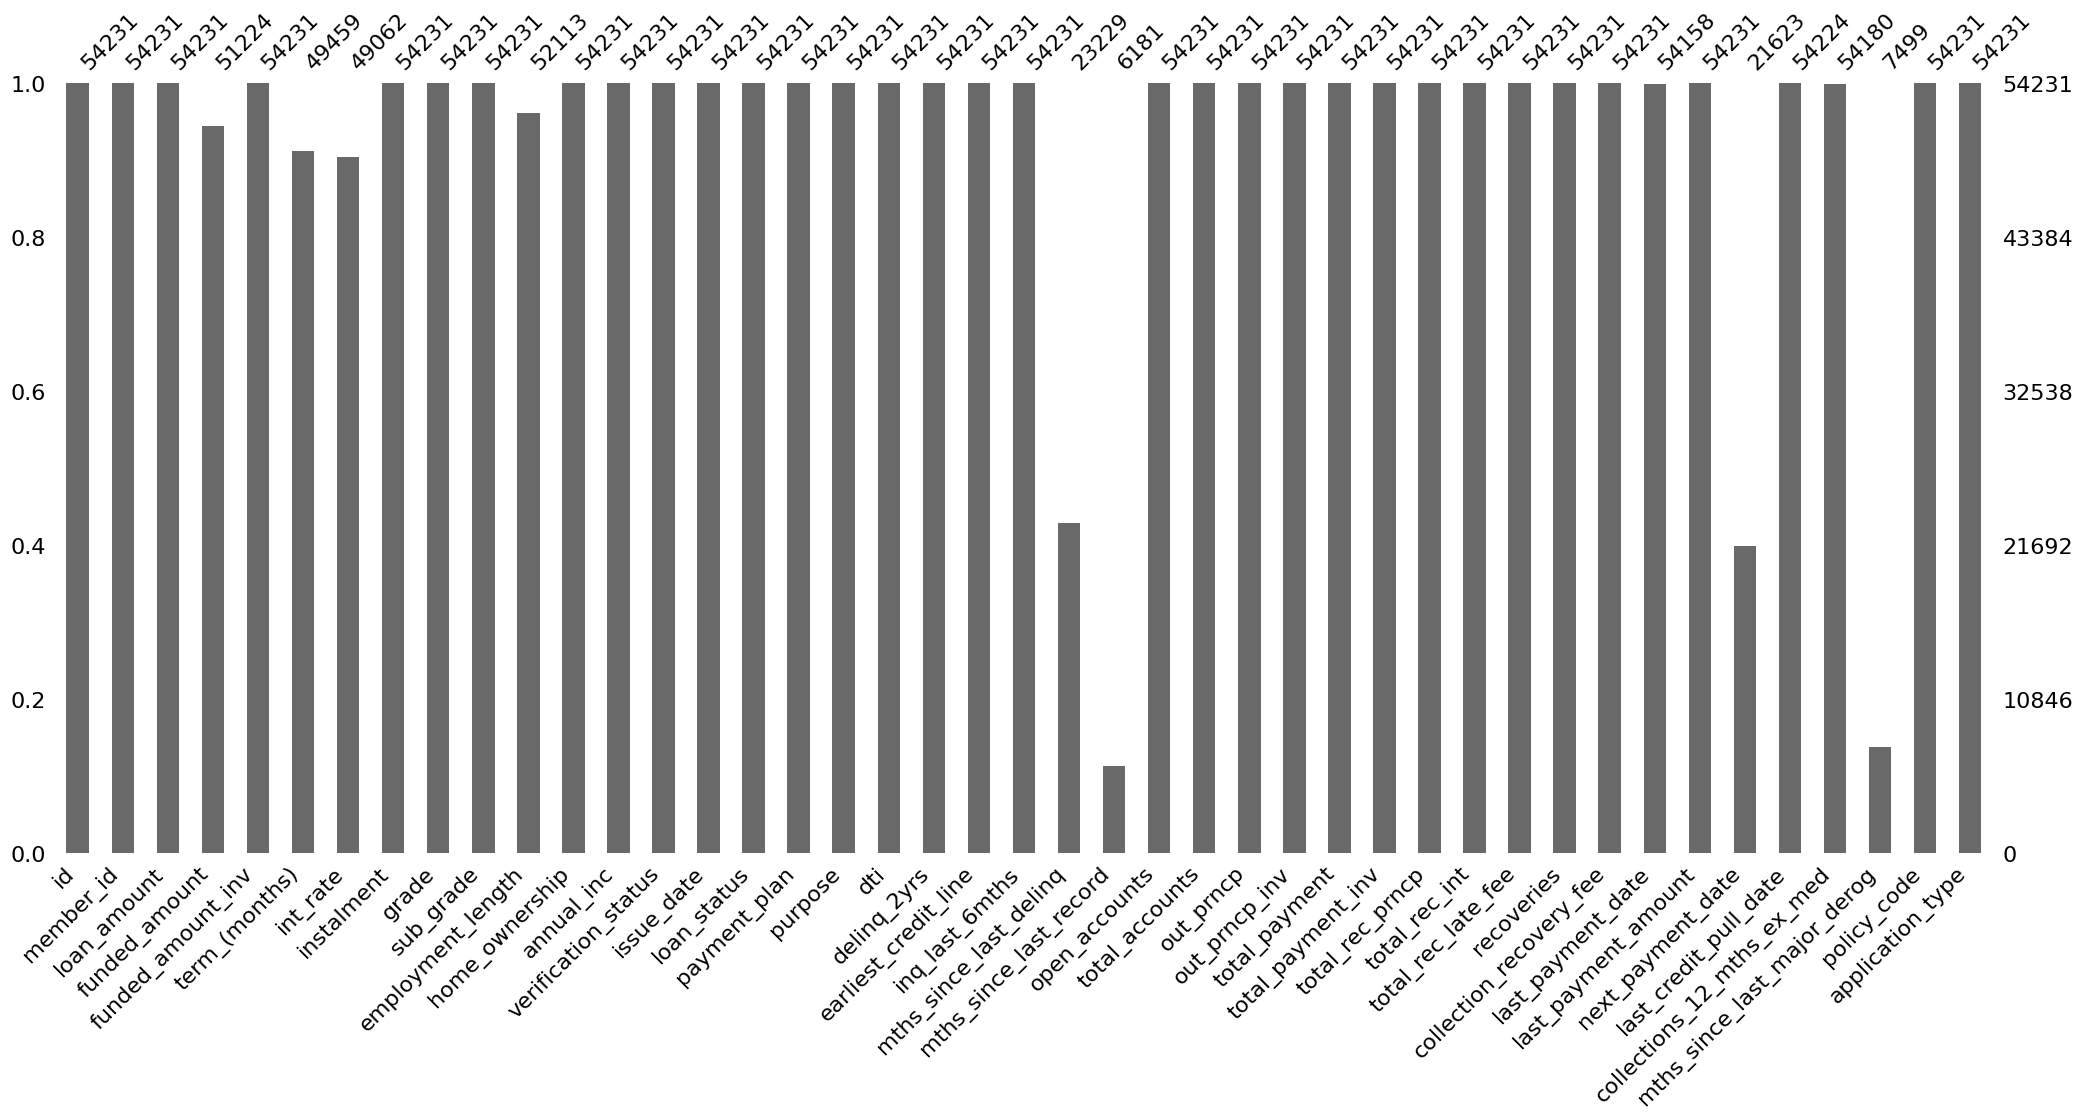

In [11]:
visualise.bar_chart_of_nulls(df)

Whilst it is great to see clearly and immediately which columns contain the most nulls, it is useful to have actual stats such as the percentage of missing values in a column.

The `null_percentage` method I have created returns us columns containing null values, and the percentage.

In [12]:
df_info.null_percentage(df)

,percentage_missing
funded_amount,5.544799
term_(months),8.799395
int_rate,9.531449
employment_length,3.905515
mths_since_last_delinq,57.166565
mths_since_last_record,88.602460
last_payment_date,0.134609
next_payment_date,60.127971
last_credit_pull_date,0.012908
collections_12_mths_ex_med,0.094042


We can see that 4 columns have a very high percentage of nulls over 50%:
- `mths_since_last_delinq`
- `mths_since_last_record`
- `next_payment_date`
- `mths_since_last_major_derog`

And so I have decided to drop these columns based on two deciding factors:
- They are not important columns for what I will be looking at
- There are too many missing values to be imputed

In [13]:
df = df.drop(columns=['mths_since_last_delinq', 'mths_since_last_record', 'next_payment_date', 'mths_since_last_major_derog'], axis=1)

df_info.size_of_dataframe(df)

Size of dataframe: (54231, 39)


We know that this has worked as our columns have dropped from 43 to 39.

Next, I will look at the `funded_amount` column with 5.54% nulls.
I want to see how highly correlated this column is with the other columns it looks similar to.

The best way to do this is with a heatmap:

<Axes: >

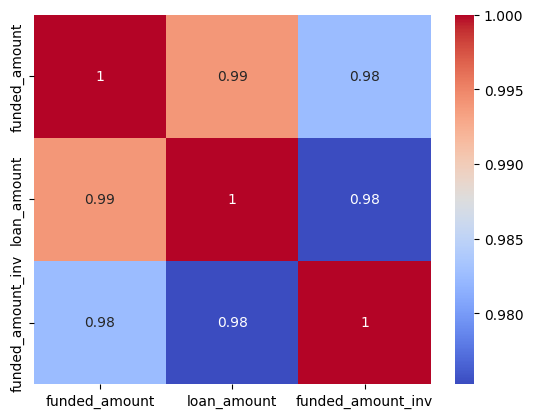

In [14]:
sns.heatmap(df[['funded_amount', 'loan_amount', 'funded_amount_inv']].corr(), annot=True, cmap='coolwarm')

Other ways to visualise if two columns are similar is as follows:

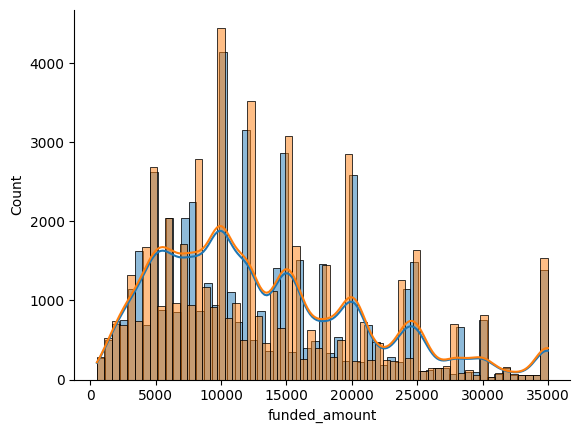

In [15]:
visualise.kde_plot(df, 'funded_amount')
visualise.kde_plot(df, 'loan_amount')

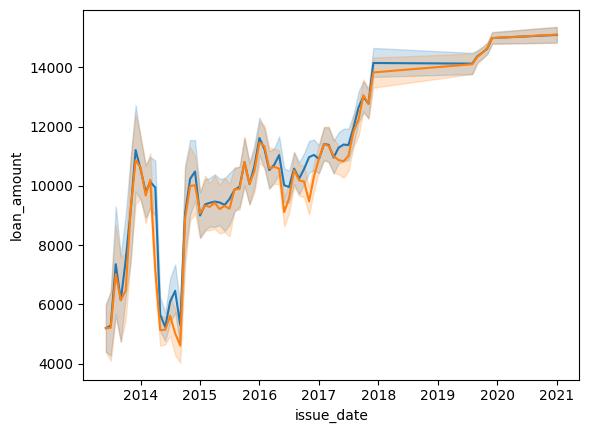

In [16]:
visualise.multi_lineplot(df, 'issue_date', 'loan_amount', 'funded_amount')

I can see it has highest correlation with `loan_amount` and so I will compare the two columns to see their similarity to see if it is a good fit to impute the missing values from `loan_amount`.

In [17]:
df_info.get_similarity_with_other_column(df, 'funded_amount', 'loan_amount')

Similarity score: 93


I am satisfied that the `funded_amount` column is extremely similar to the `loan_amount` column and so I am happy to impute the missing values of the `funded_amount` column with the entries of the `loan_amount` column.

In [18]:
df['funded_amount'] = df['funded_amount'].fillna(df['loan_amount'])

The next column I will look at is `collections_12_mths_ex_med` which contains 0.09% null values. 

I consider dropping the rows containing missing values in this column as there is only a small amount. However, I would like to avoid dropping any data unless absolutely necessary and so I will look at imputing the entries instead.

I need to find out some more information about the column to decide which imputation method is best.

In [19]:
df_info.get_median(df, 'collections_12_mths_ex_med')
df_info.get_mean(df, 'collections_12_mths_ex_med')
df_info.get_mode(df, 'collections_12_mths_ex_med')
df['collections_12_mths_ex_med'].value_counts()

Median of collections_12_mths_ex_med is: 
0.0
Mean of collections_12_mths_ex_med is: 
0.0
Most frequent value in collections_12_mths_ex_med is: 
0    0.0
Name: collections_12_mths_ex_med, dtype: float64


0.0    53971
1.0      193
2.0       14
3.0        1
4.0        1
Name: collections_12_mths_ex_med, dtype: int64

As this is a categorical column, I will impute with the mode and as mode 0.0 in this case is by far the most frequent at 53,943 entries, I am more than happy to impute with this value.

In [20]:
df['collections_12_mths_ex_med'] = df['collections_12_mths_ex_med'].fillna(0)

`employment_length` and `term_(months)` are also a categorical columns and so I will look at imputing these with the mode as well.

However, I will gain knowledge of the columns before doing so to ensure this is the best method to use here.


<Axes: >

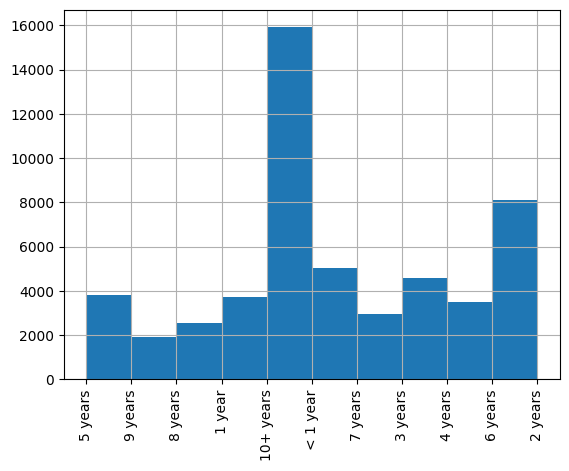

In [21]:
df['employment_length'].hist(xrot=90)

In [22]:
df_info.get_distinct_categories(df, 'employment_length')

Categories in employment_length: 
10+ years    15907
2 years       5066
< 1 year      5034
3 years       4589
5 years       3836
1 year        3708
4 years       3482
6 years       3059
7 years       2964
8 years       2537
9 years       1931
Name: employment_length, dtype: int64


In [23]:
df['employment_length'].isnull().sum()

2118

There are 2114 missing values in this column so I'd rather not drop that amount of rows.

I do not believe `employment_length` is an important variable, therefore I am happy to impute with the mode on this occasion.

In [24]:
transform.impute_mode(df, 'employment_length')

To confirm the imputation was successful:

In [25]:
df['employment_length'].isnull().sum()

0

Moving onto `term_(months)` variable which has 8.7% missing values.
Let's begin by seeing what the different term categories are:

In [26]:
df['term_(months)'].value_counts()

36    35845
60    13614
Name: term_(months), dtype: int64

In [27]:
df_info.get_mode(df, 'term_(months)')

Most frequent value in term_(months) is: 
0    36
Name: term_(months), dtype: object


<Axes: >

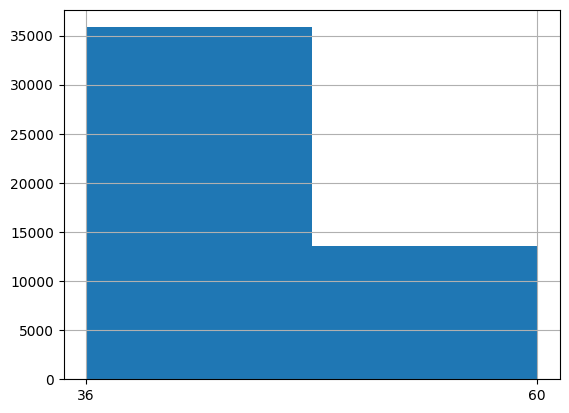

In [28]:
df['term_(months)'].hist(bins=2)

As initially thought, I will replace the missing values with the mode here:

In [29]:
transform.impute_mode(df, 'term_(months)')

I will drop the rows with missing values in the date columns as dates are difficult to impute accurately.

I am happy to drop the rows in this case as I will only be losing a tiny portion of the dataframe.

- `last_payment_date` - 73 rows containing `NaN`
- `last_credit_pull_date` - 7 rows containing `NaN`

In [30]:
df.dropna(subset=['last_payment_date'], inplace=True)
df.dropna(subset=['last_credit_pull_date'], inplace=True)

This leaves only one column left which contains nearly 10% null values: `int_rate`

In [31]:
df['int_rate'].isnull().sum()

5161

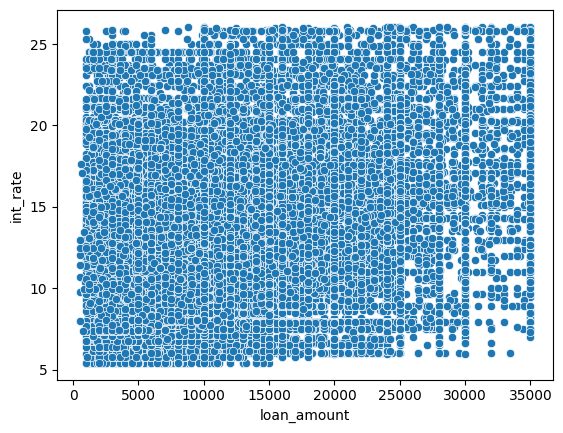

In [32]:
visualise.scatterplot(df, 'loan_amount', 'int_rate')

I cannot see any clear correlation of the interest rate against the loan amount. 

This was worth checking as there may have been some indication as to whether the higher the loan amount, the higher the interest rate etc. However, it looks like the interest rate does not depend on the loan amount at all and so I cannot use this knowledge to impute data.

In [33]:
df_info.dagostino_test(df, 'int_rate')

Statistics = 1421.707, p=0.000


With a p-value of 0, this test tells us that the distribution is normal.

However, let's view this on a Q-Q Plot:

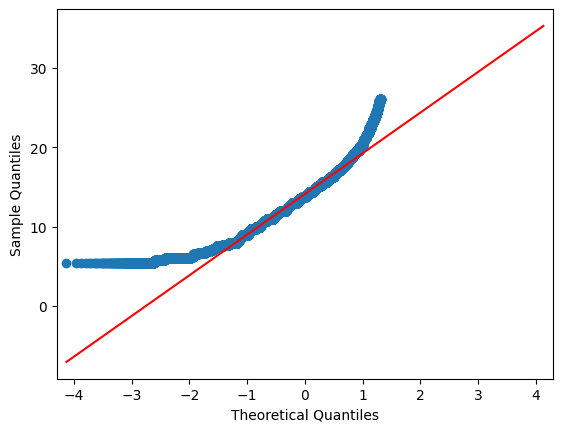

In [34]:
visualise.qq_plot(df, 'int_rate')

In [35]:
df_info.get_mean(df, 'int_rate')
df_info.get_median(df, 'int_rate')

Mean of int_rate is: 
13.51
Median of int_rate is: 
13.16


There is not a huge difference between the mean and the median.
However, as there is a slight skew, I will impute with the median on this occasion.

In [36]:
transform.impute_median(df, 'int_rate')

Finally, I will run my `null_percentage` method to check that there are no longer any null values present in the dataset and save the changes I have made to the dataset in a new csv file.

In [37]:

df_info.null_percentage(df)

,percentage_missing


In [38]:
save_changes(df, 'cleaned_loan_data.csv')